# In What Electoral System Would Donald Trump Have Won The 2020 US Election?

## Introduction

The Electoral College system has been a concrete part of the US presidential election since the founding of the country. In this system, the citizens of each state cast their votes for their choice of electors, who will cast their votes for the presidential candidates. The number of electors of each state is the sum of the number of Senates and the number of Representatives. The Electoral College consists of 538 electors in total, and each elector's vote is counted as 1 vote in the general election. In the end, the candidate who wins over the majority - which means 270 votes - wins the election. The system was created out of good intention to balance the power of small states and large states, however, criticism is getting louder after several instances in which the winner of the popular vote did not win the election due to the outcome of the Electoral College vote. This has led to questions about whether the system accurately represents the will of the US citizens and if there might be a better way to elect the President.

As the fact is that Joe Biden won in the 2020 election, the goal of the paper is to find out whether there exists any electoral system which would have allowed Donald Trump to win in the 2020 election based the original votes.

The proposed electoral systems in this paper ALL have a common presumption, that the voting unit (county or state) which will be responsible to cast ALL of its votes to one candidate. This concept, known as the "winner-take-all" principle, is similar to the existing voting system in 48 of the 50 states and Washington, D.C. in the US.

As data analysis shows that Republican voters are disproportionally located in rural areas and small cities, the 4 electoral systems proposed in the paper all put higher focus on the number of voting unit (county or state), instead of the population of voting unit (county or state). Therefore, 3 of 4 electoral systems makes Donald to win in the 2020 election.

### Variables
- Input $X_1$: Raw votes of DEM in counties
- Input $X_2$: Raw votes of REP in counties
- Input $X_3$: Raw total votes in counties
-- $X_1$, $X_2$ and $X_3$ are all vectors, each component $X_{1,i}$, $X_{2,i}$, $X_{3,i}$, where i $\in$ [1,n], represents the raw votes of DEM, the raw votes of REP and the raw total votes in a specific county, n is the count of counties.
- Output $Y_1$: Fabricated Votes of DEM in US
- Output $Y_2$: Fabricated Votes of REP in US

* **Electoral System I**
Each county has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of votes.
According to the Electoral System I,

$$ Y_1 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} > $X_1$), X_{3,i}, 0) $$

$$ Y_2 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} < X_{2,i}), X_{3,i}, 0) $$

* **Electoral System II**
Each county has one vote, it casts its vote on the party (candidate) that won the majority of votes.**
According to the Electoral System II,

$$ Y_1 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} > X_{2,i}), 1, 0) $$

$$ Y_2 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} < X_{2,i}), 1, 0) $$

* **Electoral System III**
Each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties.
According to the Electoral System III,

$$ Y_{1} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} > REPC_{i}), TVofState_{i}, 0) $$

$$ Y_{2} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} < REPC_{i}), TVofState_{i}, 0) $$

$$ DEMC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} > X_{2,j}), 1, 0) $$

$$ REPC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} ((if (X_{1,j} < X_{2,j}), 1, 0) $$

$$ TVofState_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} X3_{j} $$

* **Electoral System IV**
Each state has one vote, it casts its vote on the party (candidate) that won the majority of counties
According to the Electoral System III,

$$ Y_{1} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} > REPC_{i}), 1, 0) $$

$$ Y_{2} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} < REPC_{i}), 1, 0) $$

$$ DEMC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} > X_{2,j}), 1, 0) $$

$$ REPC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} < X_{2,j}), 1, 0) $$

## Data Cleaning/Loading

### Datasets used in this article
1. Kaggle: US Election 2020
    The information includes, states, counties, candidates, parties, and their respective votes.
2. SimpleMaps: US cities except for District of Columbia
    The information includes counties' latitude, and longitude.
3. Census Reporter: District of Columbia
    The information includes 8 Wards of District of Columbia for their latitude, and longitude.
    Note: This information was searched manually, and is manually entered onto the second dataset.

### Data Loading

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county_candidate.csv')
df.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [206]:
df_pc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county.csv')
df_pc.head()

,state,county,current_votes,total_votes,percent
0,Delaware,Kent County,87025,87025,100
1,Delaware,New Castle County,287633,287633,100
2,Delaware,Sussex County,129352,129352,100
3,District of Columbia,District of Columbia,41681,41681,100
4,District of Columbia,Ward 2,32881,32881,100


In [207]:
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/uscities.csv')
df_geo.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8586888,4576.0,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6076316,4945.0,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5910669,1522.0,shape,False,True,America/Chicago,1,75098 75287 75230 75231 75236 75237 75235 7525...,1840019440


In [208]:
pd.set_option('display.max_columns', None)

### Data Cleaning

1. Remove the rows of US Election 2020 where the candidate did not win.


In [209]:
df['county'] = df['county'].str.replace(' County', '')
df.drop(df[df['won'] == False].index, inplace = True)

2. Match the geographical coordinates with votes.



In [210]:
df['county'] = df['county'].str.replace(' County', '')
df.drop(df[df['won'] == False].index, inplace = True)
df_geo.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id', 'population', 'density'], axis = 1, inplace = True)
df_geo.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_county = pd.merge(df, df_geo, on=['county', 'state'], how = 'left')
df_county['total_votes'] = df_pc['current_votes']
df_county.head()

,state,county,candidate,party,total_votes,won,lat,lng
0,Delaware,Kent,Joe Biden,DEM,87025,True,39.1610,-75.5202
1,Delaware,New Castle,Joe Biden,DEM,287633,True,39.7415,-75.5416
2,Delaware,Sussex,Donald Trump,REP,129352,True,38.9091,-75.4227
3,District of Columbia,Ward 1,Joe Biden,DEM,41681,True,38.9072,-77.0369
4,District of Columbia,Ward 2,Joe Biden,DEM,32881,True,38.9063,-77.0340


For Electoral System I and II, in which the county is the vote casting level, data cleaning is done. They share the same dataframe for plotting purposes.

For Electoral System III and IV, in which the state is the vote casting level, continue the following steps:

3. Calculate the number of counties won by each candidate in each state.

In [211]:
df_state = df.groupby(["state", "candidate", "party"]).sum()
df_state.rename(columns={"won": "# of counties won"}, inplace = True)
#add 3 level of MultiIndex
df_state.index = [df_state.index.get_level_values(0),
            df_state.index.get_level_values(1),
                  df_state.index.get_level_values(2)]
df_state = df_state.reset_index() \
       .sort_values(['state','# of counties won'], ascending=[True,False]) \
       .set_index(['state','party'])
df_state.drop(['total_votes'], axis = 1, inplace = True)
df_state.head()

/var/folders/ww/ygv9855j1kg902lgct5j96840000gn/T/ipykernel_16749/848197282.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_state = df.groupby(["state", "candidate", "party"]).sum()


candidate  # of counties won
state   party                                 
Alabama REP    Donald Trump                 54
        DEM       Joe Biden                 13
Alaska  REP    Donald Trump                 20
        DEM       Joe Biden                 17
        WRI       Write-ins                  3

4. Keep the candidate of the highest voting only.

In [212]:
df_state1 = df_state.copy()
df_state1.reset_index(inplace=True)
df_state1.drop_duplicates(
  subset = ['state'],
  keep = 'first', inplace = True)
df_state1 = df_state1.reset_index(drop=True)
df_state1.head()

,state,party,candidate,# of counties won
0,Alabama,REP,Donald Trump,54
1,Alaska,REP,Donald Trump,20
2,Arizona,REP,Donald Trump,10
3,Arkansas,REP,Donald Trump,67
4,California,DEM,Joe Biden,35


5. Replace ALL candidates and parties' name by the winner of each state, because now all the votes of a state belongs to the winner.

In [213]:
df_state2 = df_county.copy()
df_state2.drop(['candidate'], axis = 1, inplace = True)
df_state2.drop(['party'], axis = 1, inplace = True)
df_state2 = pd.merge(df_state2, df_state1, on = 'state', how = 'left')
df_state2.head()

,state,county,total_votes,won,lat,lng,party,candidate,# of counties won
0,Delaware,Kent,87025,True,39.1610,-75.5202,DEM,Joe Biden,2
1,Delaware,New Castle,287633,True,39.7415,-75.5416,DEM,Joe Biden,2
2,Delaware,Sussex,129352,True,38.9091,-75.4227,DEM,Joe Biden,2
3,District of Columbia,Ward 1,41681,True,38.9072,-77.0369,DEM,Joe Biden,8
4,District of Columbia,Ward 2,32881,True,38.9063,-77.0340,DEM,Joe Biden,8


*Need to Improve*
*Some counties' latitude and longitude are still missing, will find other datasets to fill the vacancies.*

In [214]:
df_state2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4633 entries, 0 to 4632
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              4633 non-null   object 
 1   county             4633 non-null   object 
 2   total_votes        4633 non-null   int64  
 3   won                4633 non-null   bool   
 4   lat                2985 non-null   float64
 5   lng                2985 non-null   float64
 6   party              4633 non-null   object 
 7   candidate          4633 non-null   object 
 8   # of counties won  4633 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 330.3+ KB


## Summary Statistics Tables

In [215]:
df_stat = df_state2.copy()
df_stat.drop(['lat', 'lng'], axis = 1, inplace = True)
df_stat.describe()

,total_votes,# of counties won
count,4.633000e+03,4633.000000
mean,3.445030e+04,138.084610
std,1.244014e+05,104.045174
min,0.000000e+00,2.000000
25%,2.327000e+03,58.000000
50%,7.765000e+03,93.000000
75%,2.034600e+04,201.000000
max,4.263443e+06,349.000000


By the table above, total_votes means the total votes of a county has, # of counties won means the number of counties that a candidate has won with a state.
As from the data, the number and the size of counties within a state varies enormously within a state. This brings space where two strongest candidate, Joe Biden and Donald Trump, can compete against different systems and produce different election results. Donald Trump's policy is more in favor of smaller county voters, whereas Joe Biden's policy is more favored by the large county voters.

## Plots, Histograms, Figures

For both dataframes, remove Hawaii and Alaska out of the dataframe, to make the mainland graph more clear.

In [216]:
df_state_mainland = df_state2[~df_state2["state"].isin(["Alaska", "Hawaii"])]
df_county_mainland = df_county[~df_county["state"].isin(["Alaska", "Hawaii"])]

### Electoral System I

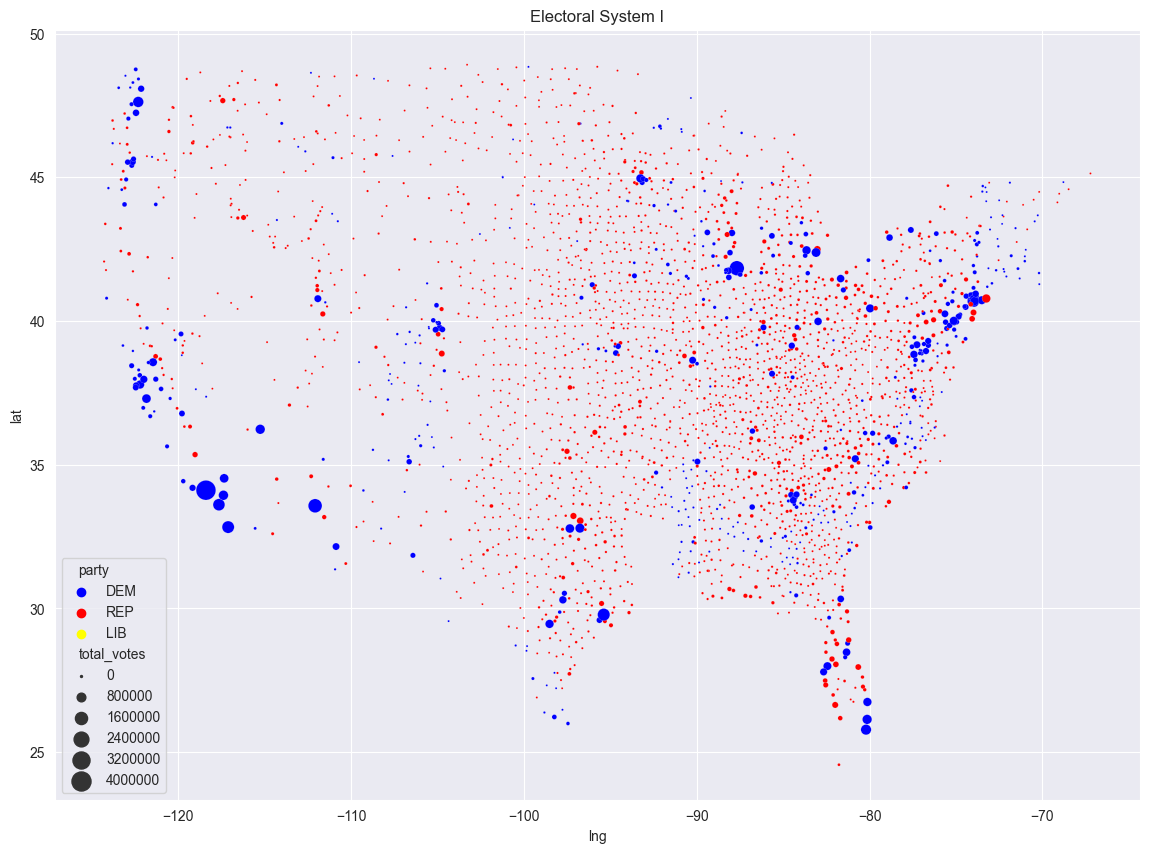

In [217]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_county_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (2, 200), palette = ['blue', 'red', 'yellow'])
plt.title("Electoral System I");

In [218]:
y1 = df_county.groupby('party')['total_votes'].sum()['DEM']
y2 = df_county.groupby('party')['total_votes'].sum()['REP']
y3 = df_county.groupby('party')['total_votes'].sum()['LIB']
y4 = df_county.groupby('party')['total_votes'].sum()['WRI']
result_1 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
pd.DataFrame(result_1, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])

,Party,Candidate,Fabricated Votes,Won
0,DEM,Joe Biden,94602378,True
1,REP,Donald Trump,64940908,False
2,LIB,Jo Jorgensen,42,False
3,WRI,Write-ins,64909,False


Under this system, each county has the same number of votes as its number of voters and casts all of its votes on the party (candidate) that won the majority of votes. In this scenario, Joe Biden emerged as the winner. This can be attributed to the fact that Biden was able to secure the majority of votes in a number of megacities, thereby gaining a significant number of electoral votes. Although Trump won large number of counties, the population still doesn't add up to the level of the population from megacities, therefore he lost.

### Electoral System II

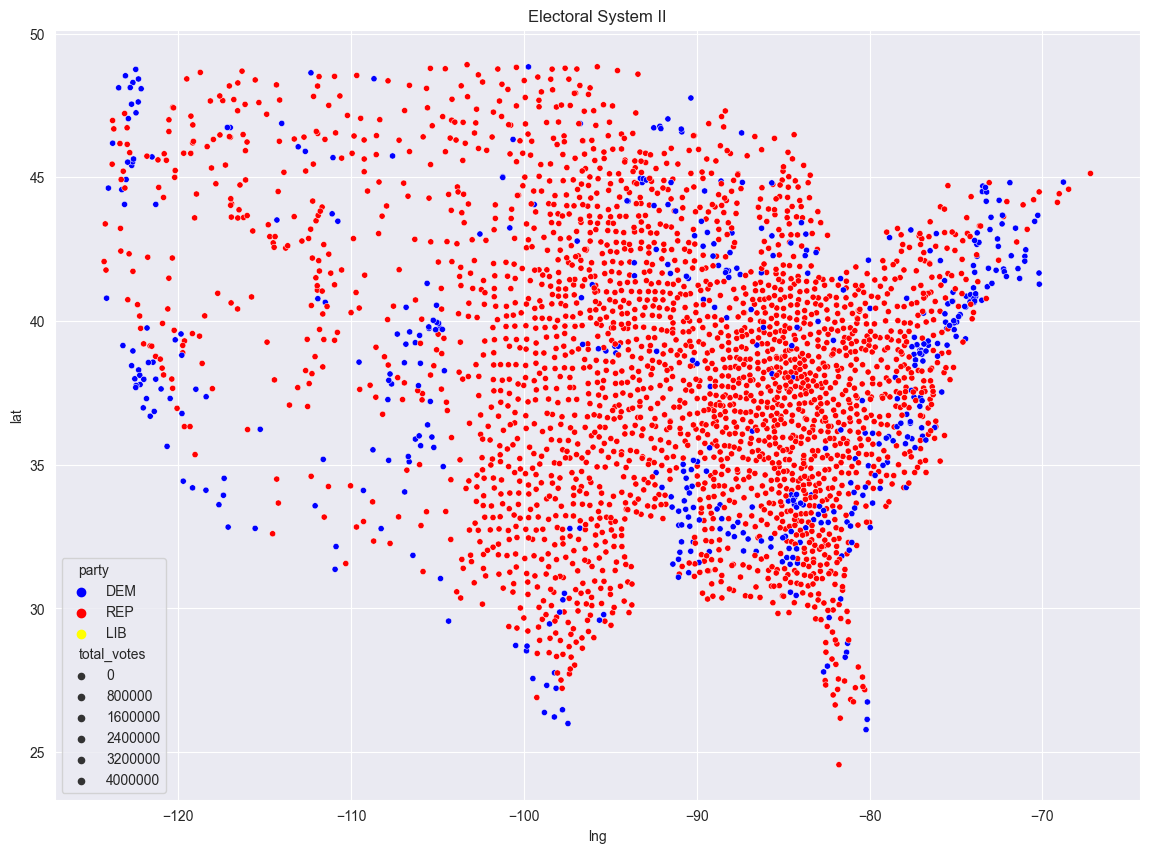

In [219]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_county_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (20, 20), palette = ['blue', 'red', 'yellow'])
plt.title("Electoral System II");

In [220]:
y1 = df_county['party'].value_counts()['DEM']
y2 = df_county['party'].value_counts()['REP']
y3 = df_county['party'].value_counts()['LIB']
y4 = df_county['party'].value_counts()['WRI']
result_2 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
pd.DataFrame(result_2, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])

,Party,Candidate,Fabricated Votes,Won
0,DEM,Joe Biden,1410,False
1,REP,Donald Trump,3219,True
2,LIB,Jo Jorgensen,1,False
3,WRI,Write-ins,3,False


Under this system, each county has only one vote and casts its vote on the party (candidate) that won the majority of votes. Donald Trump emerged as the winner under this system. Since all counties are weighted equally, the fact that Trump is popular with small counties and in several smaller counties, enabled him to secure a majority. Trump's performance in states that traditionally vote Republican has also contributed to his win.

### Electoral System III

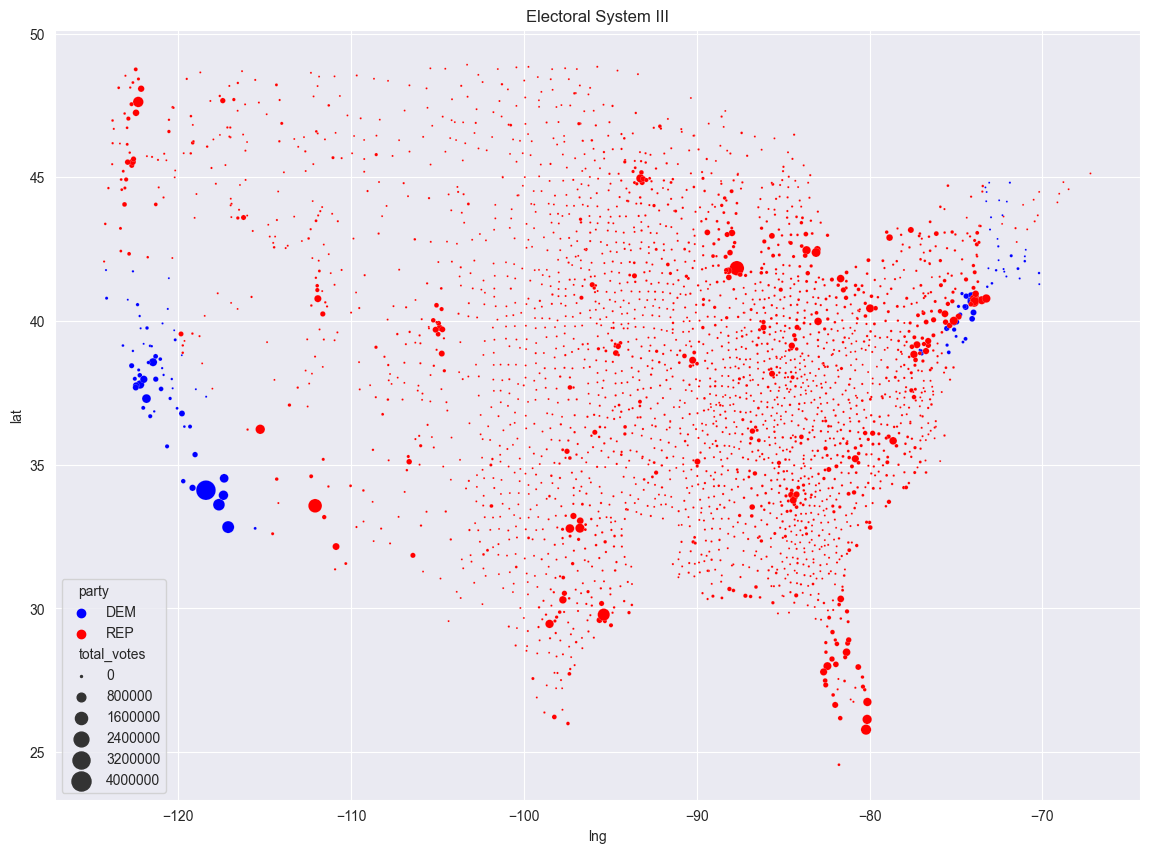

In [221]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_state_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (2, 200), palette = ['blue', 'red'])
plt.title("Electoral System III");

In [222]:
y1 = df_state2.groupby('party')['total_votes'].sum()['DEM']
y2 = df_state2.groupby('party')['total_votes'].sum()['REP']
try:
    y3 = df_state2.groupby('party')['total_votes'].sum()['LIB']
except KeyError:
    y3 = 0
try:
    y4 = df_state2.groupby('party')['total_votes'].sum()['WRI']
except KeyError:
    y4 = 0
result_3 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
pd.DataFrame(result_3, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])

,Party,Candidate,Fabricated Votes,Won
0,DEM,Joe Biden,29822468,False
1,REP,Donald Trump,129785769,True
2,LIB,Jo Jorgensen,0,False
3,WRI,Write-ins,0,False


Under this system, each state has the same number of votes as its number of voters and casts all of its votes on the party (candidate) that won the majority of counties. Donald Trump emerged as the winner under this system. Since the number of counties where Trump is popular surpasses the number of cities where Biden is popular in almost every state, except for certain states that are Democrat's conservative base. In the general case, the higher number of rural counties in most states where Trump performed well played a crucial role in his win.

### Electoral System IV

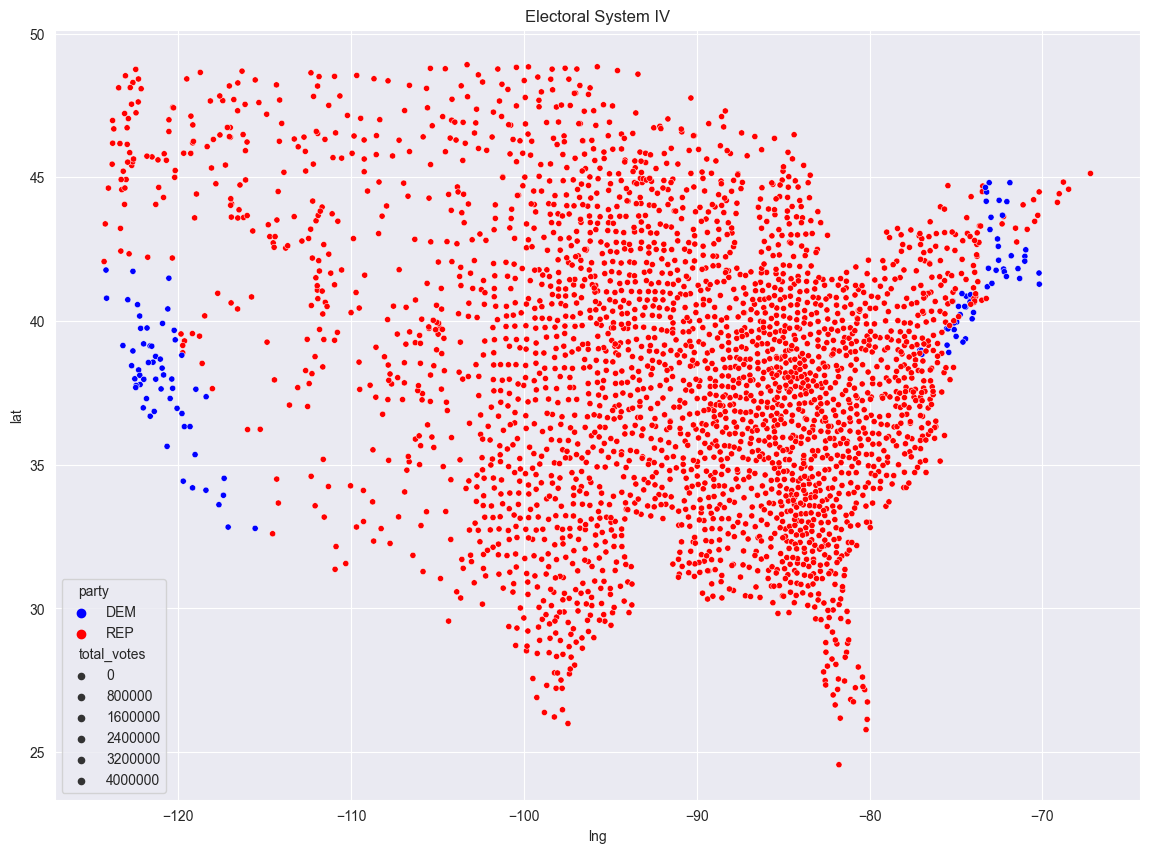

In [223]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_state_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (20, 20), palette = ['blue', 'red'])
plt.title("Electoral System IV");

In [224]:
y1 = df_state1['party'].value_counts()['DEM']
y2 = df_state1['party'].value_counts()['REP']
try:
    y3 = df_state1['party'].value_counts()['LIB']
except KeyError:
    y3 = 0
try:
    y4 = df_state1['party'].value_counts()['WRI']
except KeyError:
    y4 = 0
result_4 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
pd.DataFrame(result_4, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])

,Party,Candidate,Fabricated Votes,Won
0,DEM,Joe Biden,9,False
1,REP,Donald Trump,42,True
2,LIB,Jo Jorgensen,0,False
3,WRI,Write-ins,0,False


Under this system, each state has only one vote and casts its vote on the party (candidate) that won the majority of counties. Donald Trump emerged as the winner under this system as well. This can be due to his strong performance in a number of states, where he was able to secure the majority of counties. Compared the situation in System III, the ratio compared between Biden and Trump is down slightly, as the high number of votes from major cities are also directed to the counting.

## Conclusion
In conclusion, the results of the four different electoral systems applied to the same election data reveal the significance of the electoral process in determining the outcome of an election. The outcome can vary greatly depending on the specific system being used. In this case, Joe Biden was declared the winner under Electoral System I, where each county was allotted the same number of votes as its number of voters and all votes were cast for the candidate who won the majority of votes in that county. On the other hand, Donald Trump was declared the winner in the remaining three systems - Electoral System II, III, and IV.

In [225]:
result_4 = [['I', 'Joe Biden'],
            ['II', 'Donald Trump'],
            ['III', 'Donald Trump'],
            ['IV', 'Donald Trump']]
pd.DataFrame(result_4, columns = ['Electoral System', 'Winner'])

,Electoral System,Winner
0,I,Joe Biden
1,II,Donald Trump
2,III,Donald Trump
3,IV,Donald Trump


 This highlights the importance of choosing an appropriate electoral system that aligns with the values and goals of a given society. It also demonstrates how different electoral systems can have a significant impact on the representation of different regions, communities, and individuals. The analysis shows that the design of an electoral system can greatly influence the outcome of an election and should be carefully considered.